In [1]:
import json as json
import itertools
import re
import collections
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
hashtag_re = re.compile("(?:^|\s)[＃#]{1}(\w+)", re.IGNORECASE)

In [3]:
json_data = open("tweets-CleanFull.txt", "r")
edgeList = []
counterError = 0

for line in json_data:  #read each tweet
    try:
        line = line.replace("# ", "#")
        tweet = json.loads(line)
        hashtags = hashtag_re.findall(tweet["text"].lower())
        hashtags = list(set(hashtags))
        if (len(hashtags) > 1):
            combinations = list(itertools.combinations(hashtags, 2))
            #print((combinations[1]))
            #print(" ")
            edgeList.extend(combinations)
    except:
        counterError += 1
        continue

In [4]:
print(len(edgeList))
print(len(set(edgeList)))

4648241
832571


In [5]:
edgeListCounter = collections.Counter(edgeList)

In [6]:
len(edgeListCounter)

832571

In [7]:
G = nx.Graph()

In [8]:
for elem in edgeListCounter:
    w = edgeListCounter[elem]
    if (w > 3):
        G.add_edge(elem[0], elem[1], weight = w)

In [88]:
print(len(G.nodes))
print(len(G.edges))

12624
99028


In [14]:
edges, weights = zip(*edgeListCounter.items())

In [15]:
len(weights)

835478

In [16]:
max(weights)

70407

In [17]:
min(weights)

1

In [18]:
sum(weights) / len(weights)

5.563570794204036

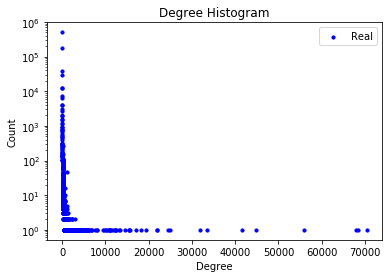

In [19]:
w_seq = sorted(weights, reverse=True)
wCount = collections.Counter(w_seq)
w, cnt = zip(*wCount.items())
fig, ax = plt.subplots()
ax.scatter(w, cnt, s=10, c='b', marker="o", label='Real')
plt.legend(loc='upper right')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

plt.show()

In [33]:
a = len(weights)

In [41]:
b = wCount[1]+wCount[2]+wCount[3]+wCount[4]+wCount[5]+wCount[6]+wCount[7]+wCount[8]+wCount[9]+wCount[10]+wCount[11]+wCount[12]+wCount[13]+wCount[14]+wCount[15]+wCount[16]

In [42]:
a-b

21842

In [13]:
G2 = nx.Graph()

In [14]:
for elem in edgeListCounter:
    w = edgeListCounter[elem]
    if (w > 20):
        G2.add_edge(elem[0], elem[1], weight = w)

In [15]:
print(len(G2.nodes))
print(len(G2.edges))

2533
15527


In [83]:
print(len(G2.nodes))
print(len(G2.edges))

972
5438


In [16]:
Gcc = sorted(nx.connected_component_subgraphs(G2), key=len, reverse=True)

In [17]:
G0 = Gcc[0]
# Size of the Giant Component
print(len(G0.nodes()))
print(len(G0.edges()))

2485
15476


In [18]:
nx.write_gexf(G0, "weighted-hashtags-w20.gexf")

In [2]:
G = nx.read_gexf("weighted-hashtags-w3.gexf")

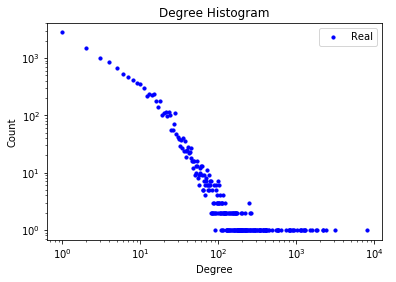

In [3]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
#degree_sequenceER = sorted([d for n, d in GER.degree()], reverse=True)
#degree_sequenceBA = sorted([d for n, d in GBA.degree()], reverse=True)

degreeCount = collections.Counter(degree_sequence)
#degreeCountER = collections.Counter(degree_sequenceER)
#degreeCountBA = collections.Counter(degree_sequenceBA)
deg, cnt = zip(*degreeCount.items())
#degER, cntER = zip(*degreeCountER.items())
#degBA, cntBA = zip(*degreeCountBA.items())

fig, ax = plt.subplots()
ax.scatter(deg, cnt, s=10, c='b', marker="o", label='Real')
#ax.scatter(degER, cntER, s=10, c='r', marker="s", label='ER')
#ax.scatter(degBA, cntBA, s=10, c='g', marker="+", label='BA')
#ax1.scatter(x[40:],y[40:], s=10, c='r', marker="o", label='second')
plt.legend(loc='upper right')
#ax.scatter(, 'r--')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xticks([d + 0.4 for d in deg])
#ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
#pos = nx.spring_layout(G)
plt.axis('off')
#nx.draw_networkx_nodes(G, pos, node_size=20)
#nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

In [4]:
len(G.nodes)

12624

In [5]:
len(G.edges)

99028

In [18]:
import collections
import matplotlib.pyplot as plt
import networkx as nx

Do not run next cell!
Run the other one, to read the networks used in the report.

In [93]:
#Our Crwaled Graph
crawledNodesCount = len(G.nodes())
crawledEdegesCount = len(G.edges())

#ER and Ba models (For Comparison)

#Erdos - Reyni:
#Expected p for given |N| and |E|
p = (2 * crawledEdegesCount ) / (crawledNodesCount * (crawledNodesCount - 1))
print ("p is : {}".format(p))
GER = nx.erdos_renyi_graph(crawledNodesCount, p)
ERNodesCount = len(GER.nodes())
EREdegesCount = len(GER.edges())

#Barabasi - Albert:
#Expected m for given |N| and |E|  (m is ceiled)
m = int(crawledEdegesCount / crawledNodesCount) + 1
print ("m is : {}".format(m))
GBA = nx.barabasi_albert_graph(crawledNodesCount, m)
BANodesCount = len(GBA.nodes())
BAEdegesCount = len(GBA.edges())

print("Our crawled graph has {} nodes and {} edges".format(crawledNodesCount, crawledEdegesCount))
print("Erdos-Reyni graph has {} nodes and {} edges".format(ERNodesCount, EREdegesCount))
print("Barabasi-Albert graph has {} nodes and {} edges".format(BANodesCount, BAEdegesCount))

p is : 0.0012428778136194347
m is : 8
Our crawled graph has 12624 nodes and 99028 edges
Erdos-Reyni graph has 12624 nodes and 98799 edges
Barabasi-Albert graph has 12624 nodes and 100928 edges


In [95]:
nx.write_gexf(GER, "Erdos-Reyni.gexf")
nx.write_gexf(GBA, "Barabasi-Albert.gexf")

In [6]:
G = nx.read_gexf("weighted-hashtags-w3.gexf")
GER = nx.read_gexf("Erdos-Reyni.gexf")
GBA = nx.read_gexf("Barabasi-Albert.gexf")

In [7]:
print("Density of our network = {}".format(nx.density(G)))
print("Density of ER network = {}".format(nx.density(GER)))
print("Density of BA network = {}".format(nx.density(GBA)))

Density of our network = 0.0012428778136194347
Density of ER network = 0.001240003686914676
Density of BA network = 0.001266724279728787


In [8]:
print("Avg degree of our network = {}".format((2*len(G.edges()))/len(G.nodes)))
print("Avg degree of ER network = {}".format((2*len(GER.edges()))/len(GER.nodes)))
print("Avg degree of BA network = {}".format((2*len(GBA.edges()))/len(GBA.nodes)))

Avg degree of our network = 15.688846641318124
Avg degree of ER network = 15.652566539923955
Avg degree of BA network = 15.989860583016476


In [9]:
print("Avg Clustering Coefficient of our network = {}".format(nx.average_clustering(G)))
print("Avg Clustering Coefficient of ER network = {}".format(nx.average_clustering(GER)))
print("Avg Clustering Coefficient of BA network = {}".format(nx.average_clustering(GBA)))

Avg Clustering Coefficient of our network = 0.6817493234994086
Avg Clustering Coefficient of ER network = 0.0012561523954712178
Avg Clustering Coefficient of BA network = 0.007785974408253775


In [10]:
#Number of Connected Components
nx.number_connected_components(G)

102

In [11]:
nx.number_connected_components(GER)

1

In [12]:
nx.number_connected_components(GBA)

1

In [61]:
Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
G0 = Gcc[0]
# Size of the Giant Component
print(len(G0.nodes()))
print(len(G0.edges()))

12366
98763


In [59]:
#Second greatest connected component
G1 = Gcc[4]
#nx.write_gexf(G1, "hashtags-secondCC.gexf")
print(len(G1.nodes()))
print(len(G1.edges()))

5
10


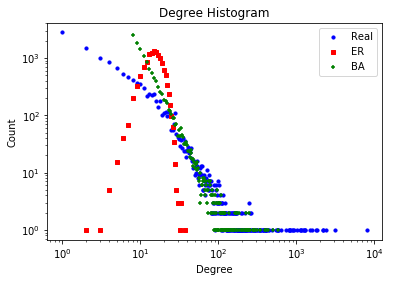

In [15]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_sequenceER = sorted([d for n, d in GER.degree()], reverse=True)
degree_sequenceBA = sorted([d for n, d in GBA.degree()], reverse=True)

degreeCount = collections.Counter(degree_sequence)
degreeCountER = collections.Counter(degree_sequenceER)
degreeCountBA = collections.Counter(degree_sequenceBA)
deg, cnt = zip(*degreeCount.items())
degER, cntER = zip(*degreeCountER.items())
degBA, cntBA = zip(*degreeCountBA.items())

fig, ax = plt.subplots()
ax.scatter(deg, cnt, s=10, c='b', marker="o", label='Real')
ax.scatter(degER, cntER, s=10, c='r', marker="s", label='ER')
ax.scatter(degBA, cntBA, s=10, c='g', marker="+", label='BA')
#ax1.scatter(x[40:],y[40:], s=10, c='r', marker="o", label='second')
plt.legend(loc='upper right')
#ax.scatter(, 'r--')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xticks([d + 0.4 for d in deg])
#ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
#pos = nx.spring_layout(G)
plt.axis('off')
#nx.draw_networkx_nodes(G, pos, node_size=20)
#nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

In [64]:
count100 = 0
for k, v in degreeCount.items():
    if k>100:
        count100 += v
count100

208

In [68]:
min(degree_sequenceBA)

8

1) Keep Latin hashtags only and convert all hashtags to lowercase
2) Don't add edges to edge list at the time of reading tweets. Just Create nodes for each hashtag. Then, if 2 hashtags appear in the same tweet, connect them. This way, we can account for tweets having just one hashtag.

In [101]:
#nx.write_gexf(G, "hashtags.gexf")
#nx.write_gexf(GER, "Erdos-Reyni.gexf")
#nx.write_gexf(GBA, "Barabasi-Albert.gexf")

In [20]:
len(G.nodes())

12624

In [21]:
len(Gcc.nodes())

12366

In [49]:
import itertools

In [50]:
print(len(G.nodes()))
combinations = list(itertools.combinations(G.nodes(), 2))
print(combinations[1])
len(combinations)

12143
('aktien', 'tipstrr')


73720153

In [1]:
distances = []
counter = 0
for nodePair in combinations:
    break
    try:
        distances.append(nx.shortest_path_length(G, source = nodePair[0], target = nodePair[1]))
    except nx.NetworkXNoPath:
        #print ("No path")
    #print(counter)
    #counter += 1
#allShortestPaths = dict(nx.shortest_path_length(G))

IndentationError: expected an indented block (<ipython-input-1-b2b1078aa58d>, line 10)

In [17]:
distances = []
with open("distancesHT.txt", "r") as f:
    for line in f:
        x = line.split(',')
        distances.append(int(x[0]))
distancesER = []
with open("distancesER.txt", "r") as f:
    for line in f:
        x = line.split(',')
        distancesER.append(int(x[0]))
distancesBA = []
with open("distancesBA.txt", "r") as f:
    for line in f:
        x = line.split(',')
        distancesBA.append(int(x[0]))

In [18]:
sum(distances) / float(len(distances))

2.5079781026652403

In [19]:
sum(distancesER) / float(len(distancesER))

3.7272686197474645

In [20]:
sum(distancesBA) / float(len(distancesBA))

3.311212761484031

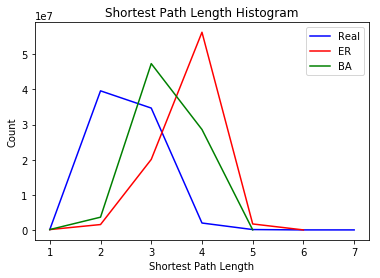

In [21]:
distances = sorted(distances, reverse=True)
distancesER = sorted(distancesER, reverse=True)
distancesBA = sorted(distancesBA, reverse=True)
# print "Degree sequence", degree_sequence
distanceCount = collections.Counter(distances)
distanceCountER = collections.Counter(distancesER)
distanceCountBA = collections.Counter(distancesBA)
dist, cnt = zip(*distanceCount.items())
distER, cntER = zip(*distanceCountER.items())
distBA, cntBA = zip(*distanceCountBA.items())

fig, ax = plt.subplots()
ax.plot(dist, cnt, 'b-', label='Real')
ax.plot(distER, cntER, 'r-', label='ER')
ax.plot(distBA, cntBA, 'g-', label='BA')
#ax1.scatter(x[40:],y[40:], s=10, c='r', marker="o", label='second')
plt.legend(loc='upper right')
#plt.plot(dist, cnt)

plt.title("Shortest Path Length Histogram")
plt.ylabel("Count")
plt.xlabel("Shortest Path Length")

#ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposy='clip')


plt.show()

In [22]:
#Clustering coefficient:
ClusCoef = nx.clustering(G)
ClusCoefER = nx.clustering(GER)
ClusCoefBA = nx.clustering(GBA)

In [23]:
from collections import defaultdict
d = defaultdict(list)
dER = defaultdict(list)
dBA = defaultdict(list)

for k, v in ClusCoef.items():
    d[G.degree(k)].append(v)
ClusCoefPlot = {}
for k, v in d.items():
    ClusCoefPlot[k]= sum(v) / float(len(v))
    
for k, v in ClusCoefER.items():
    dER[GER.degree(k)].append(v)
ClusCoefPlotER = {}
for k, v in dER.items():
    ClusCoefPlotER[k]= sum(v) / float(len(v))
    
for k, v in ClusCoefBA.items():
    dBA[GBA.degree(k)].append(v)
ClusCoefPlotBA = {}
for k, v in dBA.items():
    ClusCoefPlotBA[k]= sum(v) / float(len(v))

In [24]:
deg, cnt = zip(*ClusCoefPlot.items())
degER, cntER = zip(*ClusCoefPlotER.items())
degBA, cntBA = zip(*ClusCoefPlotBA.items())

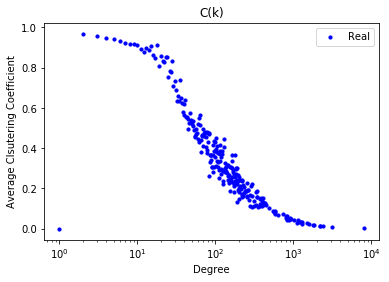

In [25]:
#Hashtag Network
fig, ax = plt.subplots()
ax.scatter(deg, cnt, s=10, c='b', marker="o", label='Real')

plt.legend(loc='upper right')

plt.title("C(k)")
plt.ylabel("Average Clsutering Coefficient")
plt.xlabel("Degree")
ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposy='clip')

plt.show()

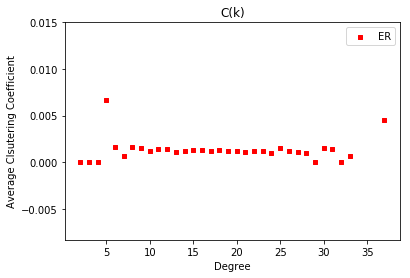

In [26]:
#ER Network
fig, ax = plt.subplots()
ax.scatter(degER, cntER, s=10, c='r', marker="s", label='ER')

plt.legend(loc='upper right')

plt.title("C(k)")
plt.ylabel("Average Clsutering Coefficient")
plt.xlabel("Degree")
#ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposy='clip')

plt.show()

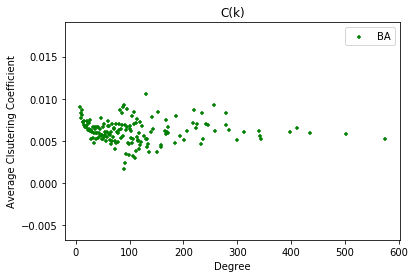

In [27]:
#BA Network
fig, ax = plt.subplots()
ax.scatter(degBA, cntBA, s=10, c='g', marker="+", label='BA')

plt.legend(loc='upper right')

plt.title("C(k)")
plt.ylabel("Average Clsutering Coefficient")
plt.xlabel("Degree")
#ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposy='clip')

plt.show()

In [31]:
#Betweenness Centrality  (Reading csv data exported by Gephi)
BetwCent = {}
ClosCent = {}
TriangCount = {}
IdToDeg = {}
with open("export.csv", "r") as f:
    f.readline() #skip the first line
    for line in f:
        x = line.split(',')
        BetwCent[x[0]] = float(x[10])
        ClosCent[x[0]] = float(x[8])
        TriangCount[x[0]] = float(x[6])
        IdToDeg[x[0]] = int(x[3])

In [32]:
from collections import defaultdict
d = defaultdict(list)
for k, v in BetwCent.items():
    d[IdToDeg[k]].append(v)
BetwCentPlot = {}
for k, v in d.items():
    BetwCentPlot[k]= sum(v) / float(len(v))

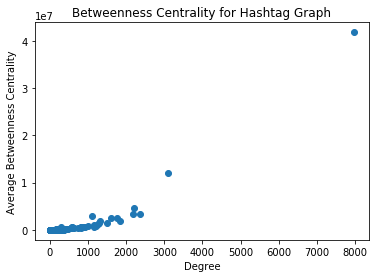

In [33]:
deg, cnt = zip(*BetwCentPlot.items())

fig, ax = plt.subplots()
plt.scatter(deg, cnt)

plt.title("Betweenness Centrality for Hashtag Graph")
plt.ylabel("Average Betweenness Centrality")
plt.xlabel("Degree")
#ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposy='clip')

plt.show()

In [36]:
#Closeness Centrality
d = defaultdict(list)
for k, v in ClosCent.items():
    d[IdToDeg[k]].append(v)
ClosCentPlot = {}
for k, v in d.items():
    ClosCentPlot[k]= sum(v) / float(len(v))

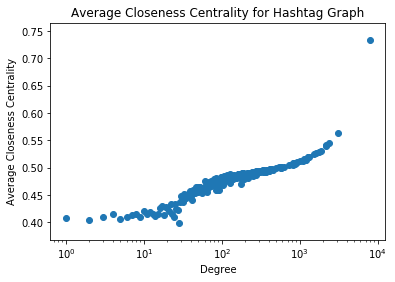

In [37]:
deg, cnt = zip(*ClosCentPlot.items())

fig, ax = plt.subplots()
plt.scatter(deg, cnt)

plt.title("Average Closeness Centrality for Hashtag Graph")
plt.ylabel("Average Closeness Centrality")
plt.xlabel("Degree")
ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposy='clip')

plt.show()

In [38]:
#Triangle Count
d = defaultdict(list)
for k, v in TriangCount.items():
    d[IdToDeg[k]].append(v)
TriangCountPlot = {}
for k, v in d.items():
    TriangCountPlot[k]= sum(v) / float(len(v))

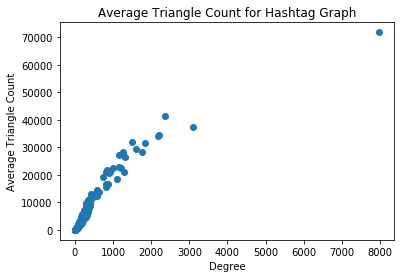

In [39]:
deg, cnt = zip(*TriangCountPlot.items())

fig, ax = plt.subplots()
plt.scatter(deg, cnt)

plt.title("Average Triangle Count for Hashtag Graph")
plt.ylabel("Average Triangle Count")
plt.xlabel("Degree")
#ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposy='clip')

plt.show()

Reading export of the Gephi for other two networks..

In [40]:
#Betweenness Centrality  (Reading csv data exported by Gephi)
# For Erdos Reyni

BetwCent = {}
ClosCent = {}
TriangCount = {}
IdToDeg = {}
with open("exportER.csv", "r") as f:
    f.readline() #skip the first line
    for line in f:
        x = line.split(',')
        BetwCent[x[0]] = float(x[10])
        ClosCent[x[0]] = float(x[8])
        TriangCount[x[0]] = float(x[6])
        IdToDeg[x[0]] = int(x[3])

In [41]:
from collections import defaultdict
d = defaultdict(list)
for k, v in BetwCent.items():
    d[IdToDeg[k]].append(v)
BetwCentPlot = {}
for k, v in d.items():
    BetwCentPlot[k]= sum(v) / float(len(v))

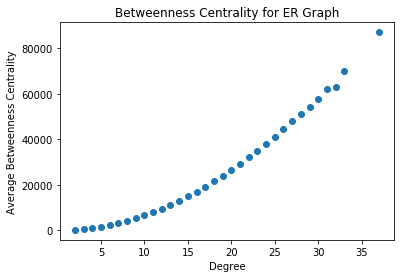

In [42]:
deg, cnt = zip(*BetwCentPlot.items())

fig, ax = plt.subplots()
plt.scatter(deg, cnt)

plt.title("Betweenness Centrality for ER Graph")
plt.ylabel("Average Betweenness Centrality")
plt.xlabel("Degree")
#ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposy='clip')

plt.show()

In [43]:
#Closeness Centrality
d = defaultdict(list)
for k, v in ClosCent.items():
    d[IdToDeg[k]].append(v)
ClosCentPlot = {}
for k, v in d.items():
    ClosCentPlot[k]= sum(v) / float(len(v))

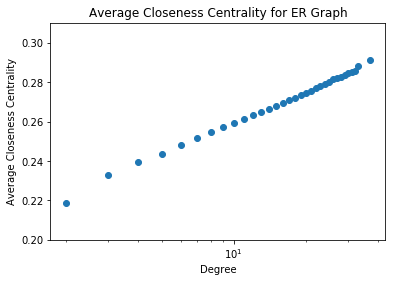

In [44]:
deg, cnt = zip(*ClosCentPlot.items())

fig, ax = plt.subplots()
plt.scatter(deg, cnt)

plt.title("Average Closeness Centrality for ER Graph")
plt.ylabel("Average Closeness Centrality")
plt.xlabel("Degree")
ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposy='clip')

plt.show()

In [45]:
#Triangle Count
d = defaultdict(list)
for k, v in TriangCount.items():
    d[IdToDeg[k]].append(v)
TriangCountPlot = {}
for k, v in d.items():
    TriangCountPlot[k]= sum(v) / float(len(v))

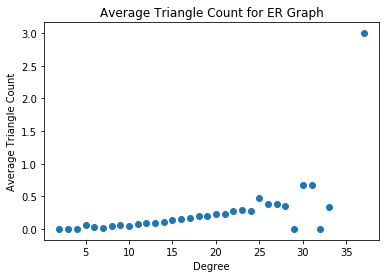

In [46]:
deg, cnt = zip(*TriangCountPlot.items())

fig, ax = plt.subplots()
plt.scatter(deg, cnt)

plt.title("Average Triangle Count for ER Graph")
plt.ylabel("Average Triangle Count")
plt.xlabel("Degree")
#ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposy='clip')

plt.show()

Now, for Barabasi - Albert

In [47]:
#Betweenness Centrality  (Reading csv data exported by Gephi)
# For Barabasi Albert

BetwCent = {}
ClosCent = {}
TriangCount = {}
IdToDeg = {}
with open("exportBA.csv", "r") as f:
    f.readline() #skip the first line
    for line in f:
        x = line.split(',')
        BetwCent[x[0]] = float(x[10])
        ClosCent[x[0]] = float(x[8])
        TriangCount[x[0]] = float(x[6])
        IdToDeg[x[0]] = int(x[3])

In [48]:
from collections import defaultdict
d = defaultdict(list)
for k, v in BetwCent.items():
    d[IdToDeg[k]].append(v)
BetwCentPlot = {}
for k, v in d.items():
    BetwCentPlot[k]= sum(v) / float(len(v))

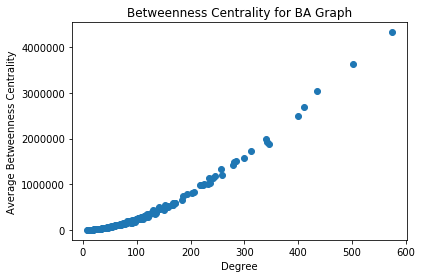

In [49]:
deg, cnt = zip(*BetwCentPlot.items())

fig, ax = plt.subplots()
plt.scatter(deg, cnt)

plt.title("Betweenness Centrality for BA Graph")
plt.ylabel("Average Betweenness Centrality")
plt.xlabel("Degree")
#ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposy='clip')

plt.show()

In [50]:
#Closeness Centrality
d = defaultdict(list)
for k, v in ClosCent.items():
    d[IdToDeg[k]].append(v)
ClosCentPlot = {}
for k, v in d.items():
    ClosCentPlot[k]= sum(v) / float(len(v))

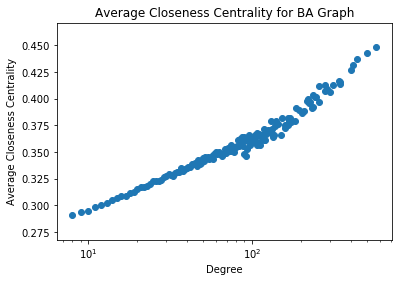

In [51]:
deg, cnt = zip(*ClosCentPlot.items())

fig, ax = plt.subplots()
plt.scatter(deg, cnt)

plt.title("Average Closeness Centrality for BA Graph")
plt.ylabel("Average Closeness Centrality")
plt.xlabel("Degree")
ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposy='clip')

plt.show()

In [52]:
#Triangle Count
d = defaultdict(list)
for k, v in TriangCount.items():
    d[IdToDeg[k]].append(v)
TriangCountPlot = {}
for k, v in d.items():
    TriangCountPlot[k]= sum(v) / float(len(v))

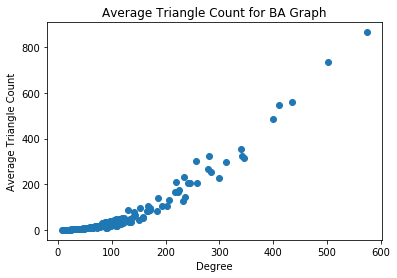

In [53]:
deg, cnt = zip(*TriangCountPlot.items())

fig, ax = plt.subplots()
plt.scatter(deg, cnt)

plt.title("Average Triangle Count for BA Graph")
plt.ylabel("Average Triangle Count")
plt.xlabel("Degree")
#ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposy='clip')

plt.show()